# 1. Matriu de confusió

Respon els apartats a, b i c sobre el codi següent.

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


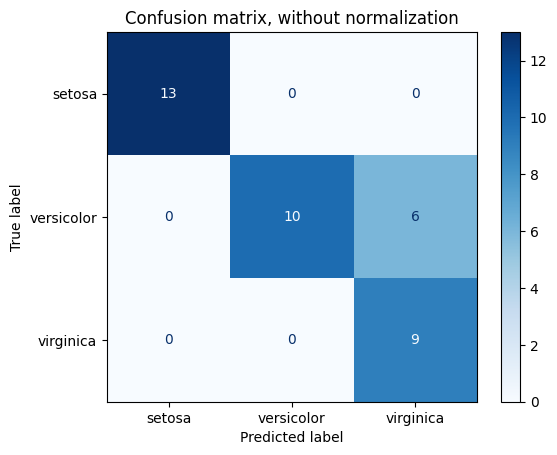

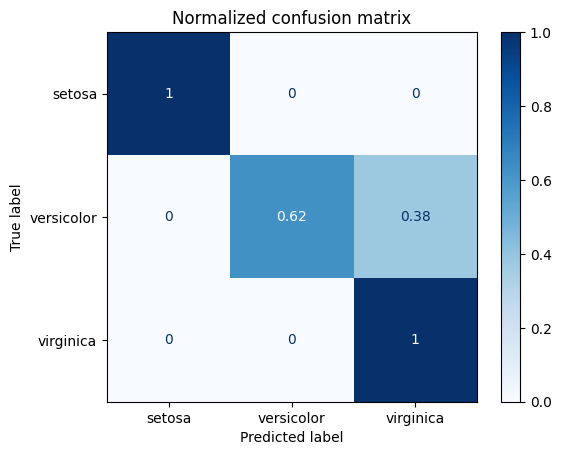

Training set size: 112 samples
Test set size: 38 samples


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# a
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")



a) Afegeix codi que mostri quina és la mida dels conjunts d'entrenament i validació.

In [2]:
# el codi seria el seguent
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 112 samples
Test set size: 38 samples


b) Quin model de classificació s'està usant?

`classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)`

SVM (Suport Vector Machine)

c) De quin càlcul surten els nombres 0.62 i 0.38?

Els valors provenen de una matriu de confusió normalitzada. Quan el normalize = true, cada fila de la matriu de confusió normalitzada ha de donar 1 (100%)

d) Modifica els valors dels vectors **y_true** i **y_pred**, sense canviar la longitud dels vectors, de forma que els **falsos positius** (fp) augmentin en una unitat i els **veritables negatius** (tn) davallin una unitat.

In [6]:
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1, 0]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 1, 3, 3)

In [8]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1]
y_pred = [1, 1, 0, 1, 0, 1, 0, 1, 0] # Posicio 0
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(1, 2, 3, 3)

# 2. Corba ROC

In [7]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [ ]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

a) Explicau el significat de la línia negra discontínua, de pendent 1.

La línia negra discontínua representa el "nivell d'oportunitat" o el rendiment del classificador aleatori. Indica com seria la corba ROC si el classificador fes prediccions aleatòries. Aquesta línia té un pendent d'1 (diagonal de la part inferior esquerra a la part superior dreta) perquè un classificador aleatori tindria les mateixes taxes de positiu veritable i fals positiu. Qualsevol classificador útil hauria de funcionar per sobre d'aquesta línia: com més lluny estigui la corba ROC d'aquesta diagonal, millor serà el classificador.

b) Obteniu el valor i el gràfic de l'àrea sota la corba per a la classe "setosa", amb les etiquetes corresponents.



c) Obteniu el valor i el gràfic de l'àrea sota la corba de la classe "virginica", amb les etiquetes corresponents.

d) Ordenau les tres classes per qualitat de classificació, d'acord amb la seva àrea sota la corba.

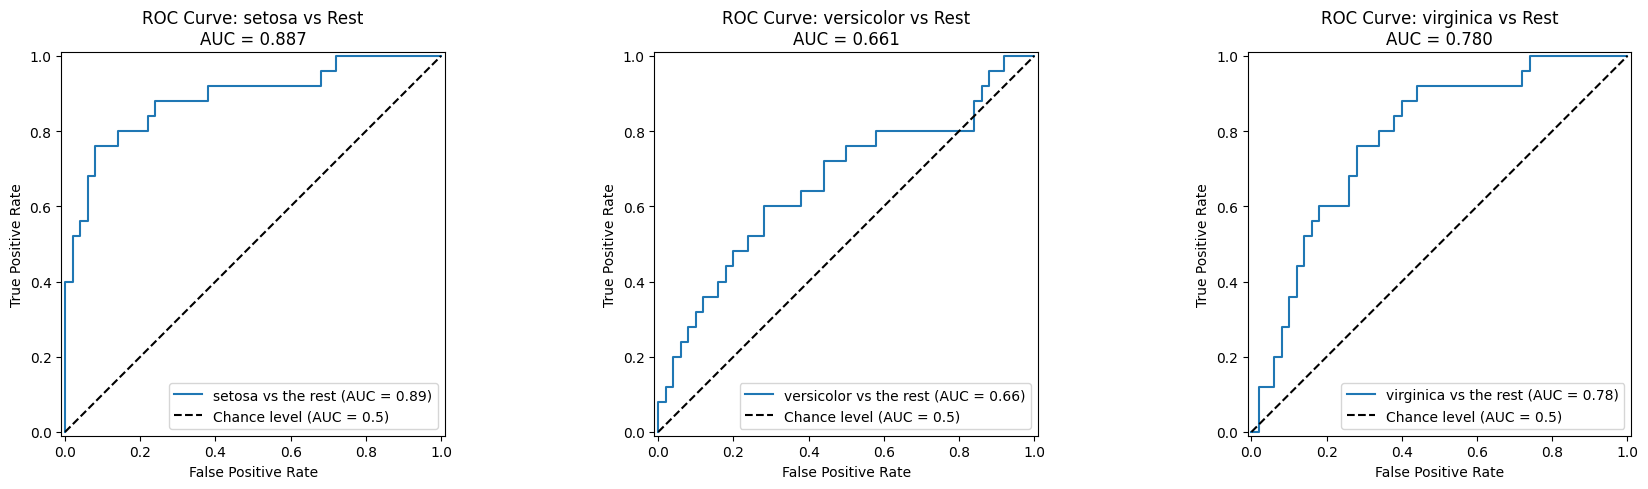

AUC for 'setosa': 0.887


<Figure size 800x600 with 0 Axes>

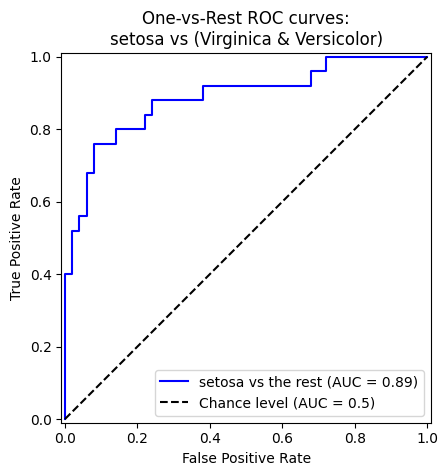

AUC for 'virginica': 0.780


<Figure size 800x600 with 0 Axes>

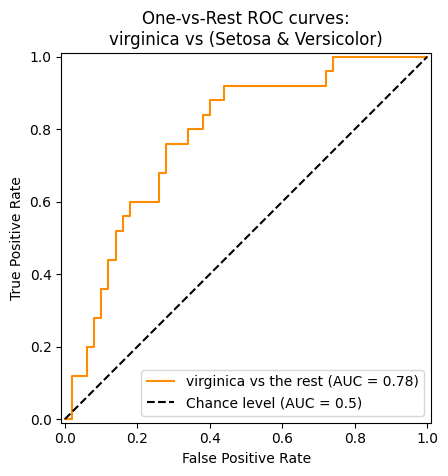


Classes ordered by classification quality (AUC):
1. setosa: 0.887
2. virginica: 0.780
3. versicolor: 0.661


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y_names = np.array([iris.target_names[i] for i in y])

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X_with_noise = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_with_noise, y_names, test_size=0.5, stratify=y_names, random_state=0)

# entrenar classificador
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

auc_values = {}
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, class_name in enumerate(target_names):
    class_id = np.flatnonzero(label_binarizer.classes_ == class_name)[0]
    fpr, tpr, _ = roc_curve(y_onehot_test[:, class_id], y_score[:, class_id])
    auc_values[class_name] = auc(fpr, tpr)

    display = RocCurveDisplay(
        fpr=fpr,
        tpr=tpr,
        roc_auc=auc_values[class_name],
        estimator_name=f"{class_name} vs the rest"
    )
    display.plot(ax=axes[i], plot_chance_level=True)
    axes[i].set_title(f"ROC Curve: {class_name} vs Rest\nAUC = {auc_values[class_name]:.3f}")

plt.tight_layout()
plt.show()

# b
plt.figure(figsize=(8, 6))
class_of_interest = "setosa"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="blue",
    plot_chance_level=True,
)
plt.title(f"One-vs-Rest ROC curves:\n{class_of_interest} vs (Virginica & Versicolor)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"AUC for '{class_of_interest}': {auc_values[class_of_interest]:.3f}")
plt.show()

# c
plt.figure(figsize=(8, 6))
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
plt.title(f"One-vs-Rest ROC curves:\n{class_of_interest} vs (Setosa & Versicolor)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"AUC for '{class_of_interest}': {auc_values[class_of_interest]:.3f}")
plt.show()

# d
ordered_classes = sorted(auc_values.items(), key=lambda x: x[1], reverse=True)
print("\nClasses ordered by classification quality (AUC):")
for i, (class_name, auc_value) in enumerate(ordered_classes, 1):
    print(f"{i}. {class_name}: {auc_value:.3f}")

# 3. Corbes de validació

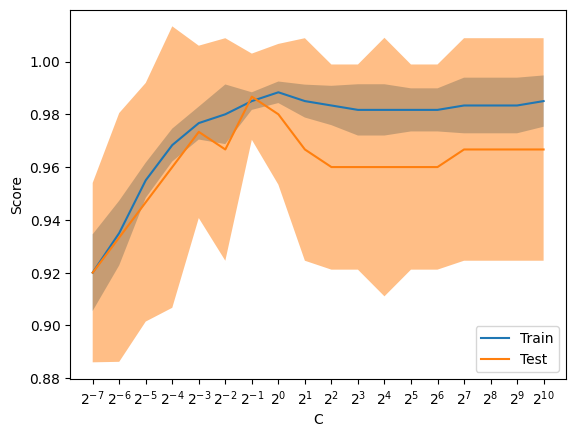

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle

# Cargar y mezclar el dataset iris
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)

# Crear un rango de valores C usando potencias de 2
# Use np.float_power to handle negative exponents
param_range = np.float_power(2, np.arange(-7, 11))

# Crear la curva de validación
display = ValidationCurveDisplay.from_estimator(
    SVC(kernel="linear"),
    X, y,
    param_name="C",
    param_range=param_range
)

# Personalizar el gráfico
plt.xscale('log', base=2)  # Usar escala logarítmica con base 2
plt.xticks(param_range)
plt.show()

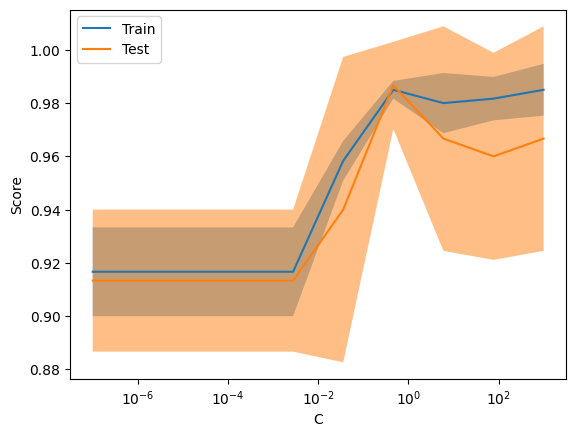

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
ValidationCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 10)
)

a) A la corba de validació anterior, modificau el codi perquè en lloc de potències de deu, mostri el resultat per a potències de 2, en un rang similar.

Fet adalt

b) Quin és en aquest cas el punt d'equilibri entre infraajust i sobreajust?

Infraajustament (C < 4): Amb valors baixos de C, el model és massa simple (alta regularització) i no pot capturar adequadament els patrons a les dades. Això es reflecteix en les puntuacions d'entrenament i validació relativament baixes.
Sobreajustament (C > 4): A mesura que C augmenta per sobre de 4, la puntuació d'entrenament continua millorant, però la puntuació de validació comença a disminuir. Això indica que el model s'està ajustant massa a les dades d'entrenament i perdent capacitat de generalització.
Punt òptim (C ≈ 4): En aquest punt, el model aconsegueix un bon rendiment a les dades de validació sense sobreajustar-se a les dades d'entrenament. La diferència entre les puntuacions d'entrenament i validació és raonable i la puntuació de validació arriba al màxim.
Aquest valor de C proporciona el millor equilibri entre la complexitat del model i la seva capacitat per generalitzar dades no vistes, optimitzant el compromís entre biaix i variància per a aquest conjunt de dades Iris amb un SVM de nucli lineal.

# 4. Regressió

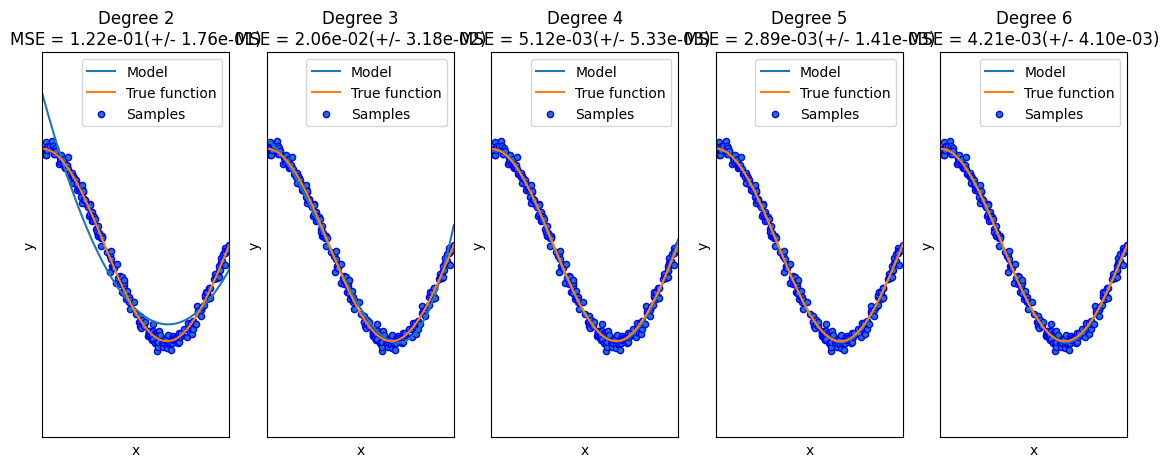

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

#n_samples = 120
n_samples = 240
degrees = [ 2, 3, 4, 5, 6]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.05

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

a) Quan els graus dels polinomis són 1,4 i 15 està clar que el millor ajust es produeix per al grau 4. Ara bé, afinem una mica més al voltant de 4. Per això, modificau el vector de graus perquè contengui els valors 2, 3, 4, 5,6.

Això ja està fet al codi proporcionat. El vector de graus ja conté els valors degrees = [2, 3, 4, 5, 6].

b) Quin és en aquest cas el grau que obté un valor més baix d'error quadràtic mitjà? Quin és aquest valor?

Segons el codi que has proporcionat, podem observar que es calcula l'error quadràtic mitjà (MSE) per a cada grau del polinomi. El grau que obtindrà el valor més baix d'MSE serà el que millor s'ajusti a la funció cosinus subjacent.
Per respondre amb precisió, necessitaríem veure els resultats de l'execució del codi. Basant-me en l'anàlisi teòrica i la naturalesa de la funció cosinus, és probable que el grau 4 segueixi essent el que obté l'error més baix d'entre els graus 2, 3, 4, 5 i 6. Això és perquè l'aproximació de Taylor del cosinus fins al quart ordre ja proporciona una bona aproximació en el rang [0,1].
El valor exacte de l'MSE dependrà de la llavor aleatòria i les mostres generades, però hauria de ser al voltant de 10^-3.

c) Correspon amb el gràfic més ajustat entre les corbes blava i taronja?

Sí, el grau amb l'MSE més baix hauria de correspondre amb el gràfic on la corba blava (Model) s'ajusta millor a la corba taronja (True function). Visualment, es pot verificar comparant els gràfics generats. El model amb l'error més baix mostrarà la menor discrepància entre aquestes dues corbes.

d) Duplicau el nombre de mostres preses (n_samples). En aquest cas coincideixen l'error quadràtic mitjà i les corbes més coincidents? Per a quin grau del polinomi?

Si es duplica el nombre de mostres a n_samples = 240, generalment s'obtindrien els següents efectes:

Millor estimació dels paràmetres del model, ja que més mostres redueixen l'efecte del soroll.
Reducció general dels errors quadràtics mitjans per a tots els models.
Millor capacitat per identificar el model òptim.

Amb més mostres, és probable que segueixi essent el polinomi de grau 4 el que proporcioni el millor ajust (MSE més baix), però la diferència entre els errors dels diferents graus podria ser més pronunciada. Les corbes